# **Time Series Data Analysis Project**

## **AirLine pessenger** 

In [2]:
# import libaraies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
# load dataset 
df = pd.read_csv('AirPassengers.csv')
# print the first few rows of dataframe
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


# Data Pre-Processing

# change the name of columns 

In [4]:
# change the name of columns
df.columns = ['Date', 'Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


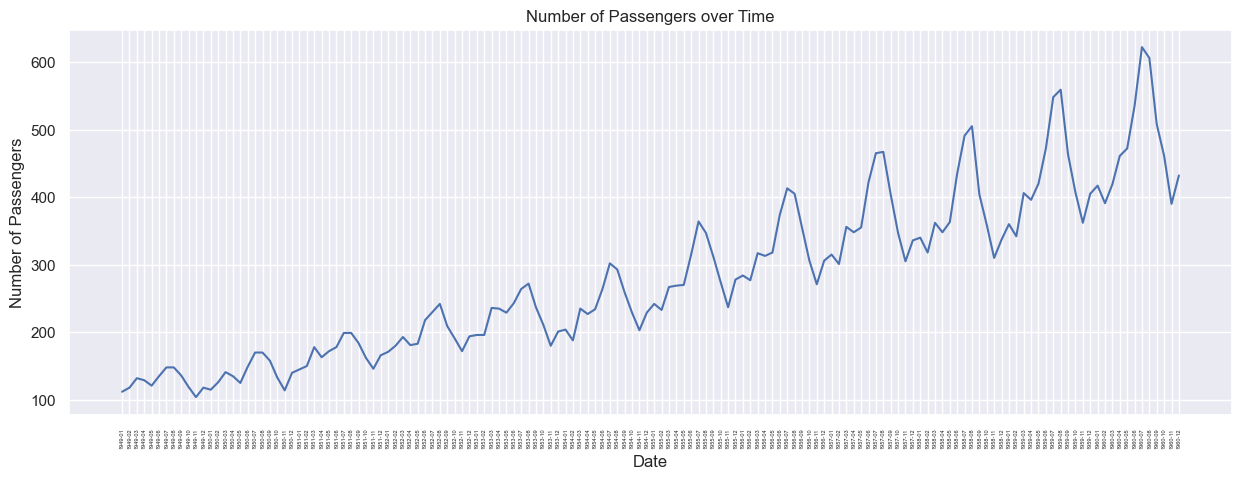

In [5]:
# plot the data using sns
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x='Date', y='Number of Passengers', data=df)
# set the labels
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers over Time')
plt.xticks(rotation=90,fontsize=4)
plt.show()


In [6]:
# make same plot using plotly
import plotly.express as px
fig = px.line(df, x='Date', y='Number of Passengers', title='Number of Passengers over Time')
# change the x-axis limits
# fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(line_color='red')
fig.show()


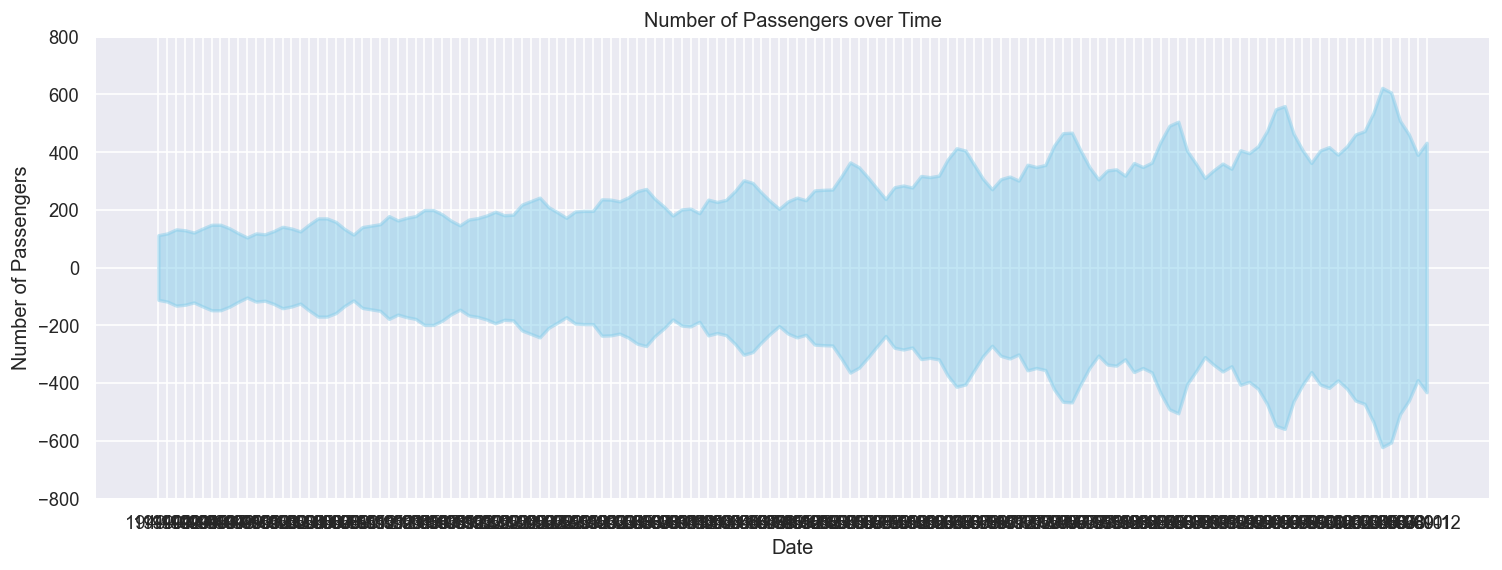

In [7]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# two side plot 
fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='skyblue')
plt.title('Number of Passengers over Time (Two Side View)', fontsize=16)
plt.ylim(-800, 800)
plt.title('Number of Passengers over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

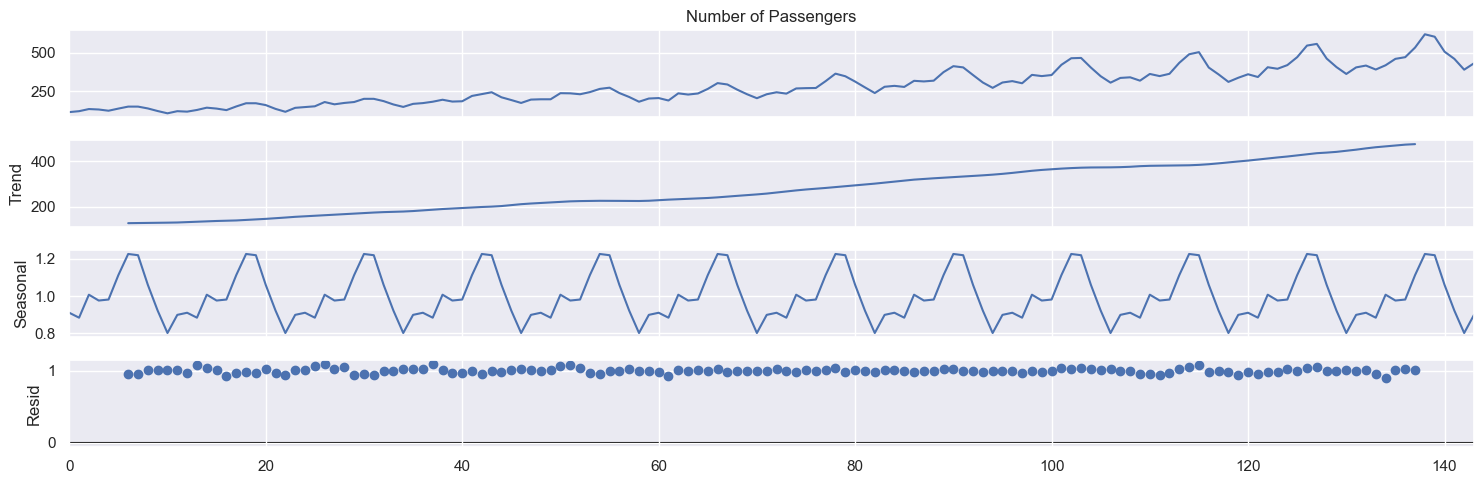

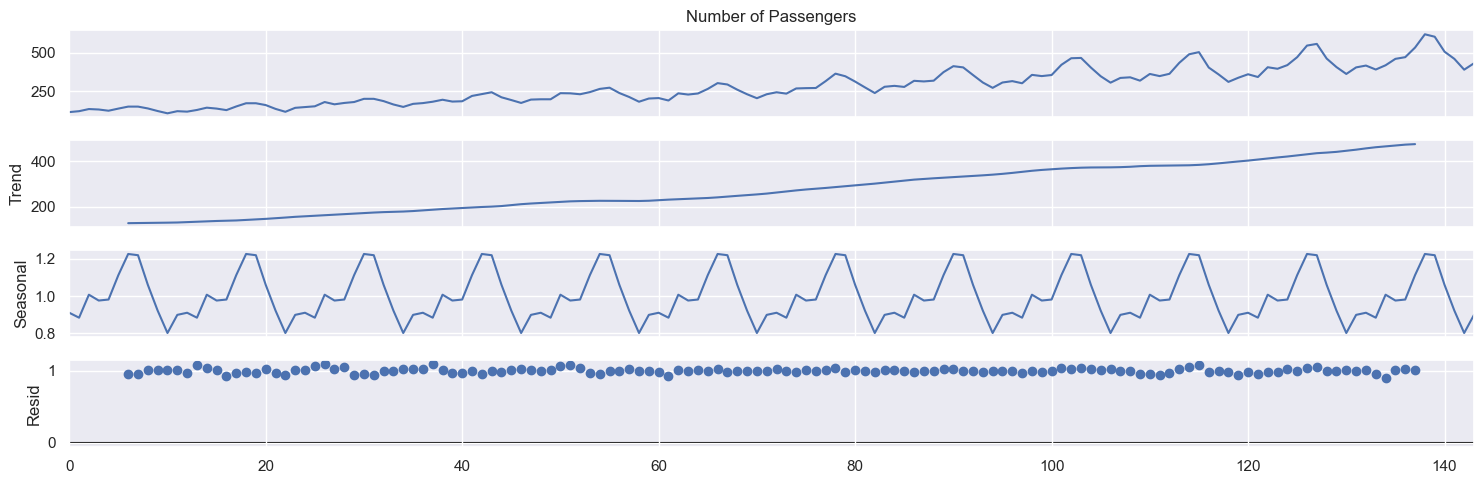

In [8]:
# decompose the data
result = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
result.plot()


## **Total Months of Data** 

In [9]:
# how many month are our data 
# Calculate the number of months in the data
num_months = df['Date'].nunique()
print("Number of months in the data:", num_months)

Number of months in the data: 144


In [10]:
# convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# how many years in our data
# Calculate the number of years in the data
num_years = df['Date'].dt.year.nunique()
print("Number of years in the data:", num_years)

df.head()

Number of years in the data: 12


,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
df.head()

,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## **Create a Column by Nmae Of Months**

In [12]:
import calendar

# Create a column related to month names using a for loop and the dt accessor
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()




,Date,Number of Passengers,Month
0,1949-01-01,112,Jan
1,1949-02-01,118,Feb
2,1949-03-01,132,Mar
3,1949-04-01,129,Apr
4,1949-05-01,121,May



## **Most Travelled Month** 


In [13]:
# Calculate the average number of passengers for each month
avg_passengers_per_month = df.groupby('Month')['Number of Passengers'].mean()

# when passengers tarvling mostly ?
most_travelled_month = avg_passengers_per_month.idxmax()
most_travelled_month


'Jul'

##  **Total avg Of Passengers Travelled In Each Month** 


In [14]:
# most Travelled per month of avg of month and how much avg of this month

# Calculate the average number of passengers for each month
avg_passengers_per_month = df.groupby('Month')['Number of Passengers'].mean()
avg_passengers_per_month



Month
Apr    267.083333
Aug    351.083333
Dec    261.833333
Feb    235.000000
Jan    241.750000
Jul    351.333333
Jun    311.666667
Mar    270.166667
May    271.833333
Nov    232.833333
Oct    266.583333
Sep    302.416667
Name: Number of Passengers, dtype: float64

In [15]:
# print the avg of july month
july_avg_passengers = avg_passengers_per_month['Jul']
print("The average number of passengers in July is:", july_avg_passengers)

The average number of passengers in July is: 351.3333333333333


## **Lowest Travelled Month**

In [16]:
low_travelled_month = avg_passengers_per_month.idxmin()
low_travelled_month


'Nov'

In [17]:
# The month with the lowest average number of passenger ?
months = list(calendar.month_abbr)
low_travelled_month_index = months.index(avg_passengers_per_month.idxmin())
print("The month with the lowest average number of passengers is:", calendar.month_name[low_travelled_month_index])


The month with the lowest average number of passengers is: November


In [18]:
nov_avg_passengers = avg_passengers_per_month['Nov']
print("The average number of passengers in November is:", nov_avg_passengers)

The average number of passengers in November is: 232.83333333333334


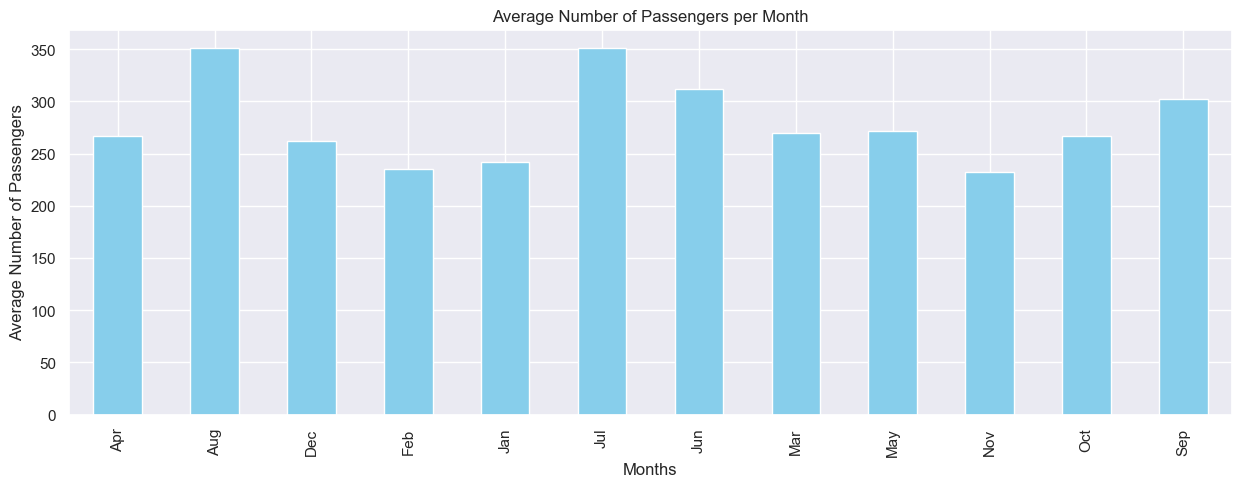

In [19]:
# Plot of average number of passengers per months
avg_passengers_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Months')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers per Month')
plt.show()

## **Check The Day When Passengers Travelled The Most**

In [20]:
# Check The Day When Passengers Travelled The Most?
# Create a new column called 'Day' using the dt accessor
df['Day'] = df['Date'].dt.day_name()

# Find the day with the highest average number of passengers
most_travelled_day = df.groupby('Day')['Number of Passengers'].mean().idxmax()
print("The day with the highest average number of passengers is:", most_travelled_day)

The day with the highest average number of passengers is: Friday


## **Check The avg Day When Passengers Travelled The Most**

In [21]:
# **Check The avg Day When Passengers Travelled The Most**
# Calculate the average number of passengers for each day
avg_passengers_per_day = df.groupby('Day')['Number of Passengers'].mean()
print("The average number of passengers on the most travelled day is:", avg_passengers_per_day['Friday'])



The average number of passengers on the most travelled day is: 296.7142857142857


## **Check The Day When Passengers Travelled The Lowest**

In [22]:
# **Check The Day When Passengers Travelled The Least**

# Create a new column called 'Day' using the dt accessor
df['Day'] = df['Date'].dt.day_name()

# Find the day with the lowest average number of passengers
least_travelled_day = df.groupby('Day')['Number of Passengers'].mean().idxmin()
print("The day with the lowest average number of passengers is:", least_travelled_day)

The day with the lowest average number of passengers is: Saturday


## **plot of average number of passengers per day**

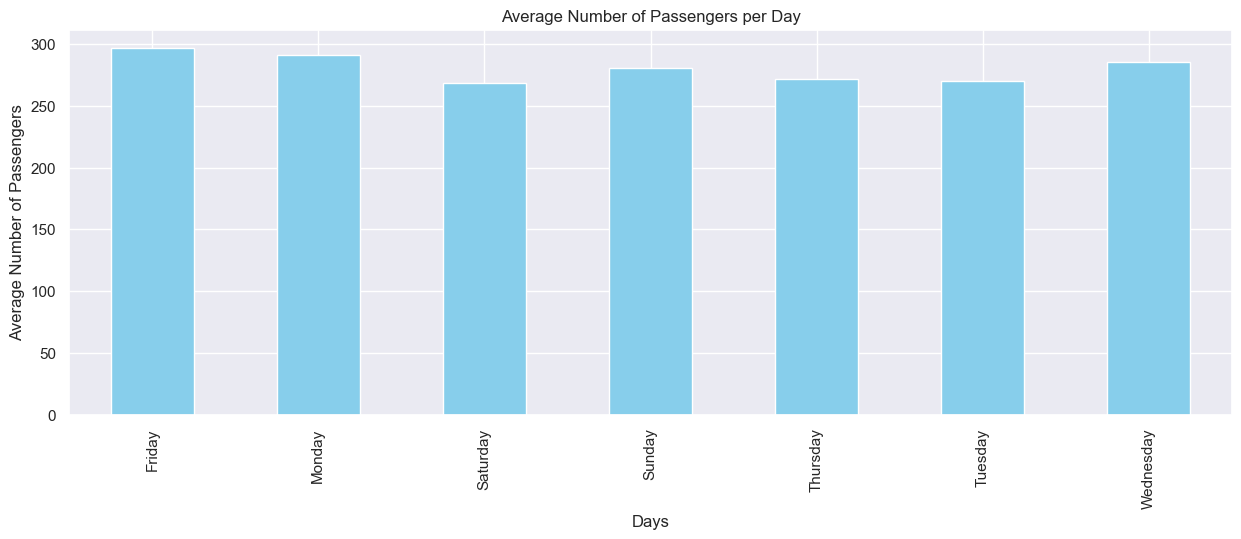

In [23]:
# Plot of average number of passengers per day
avg_passengers_per_day.plot(kind='bar', color='skyblue')
plt.xlabel('Days')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers per Day')
plt.show()

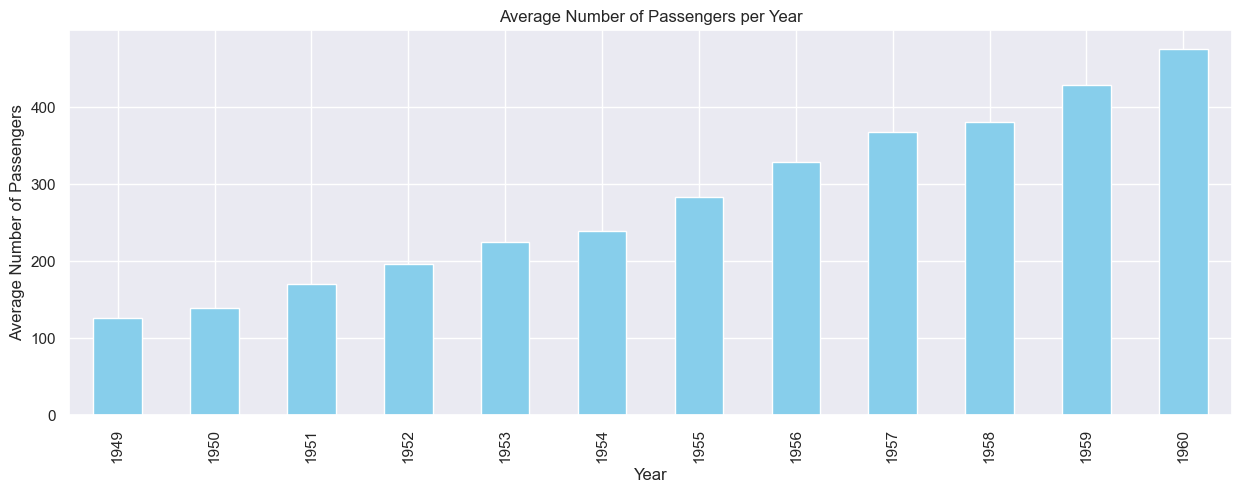

In [24]:
# chek the yearly passengers
df['Year'] = df['Date'].dt.year
yearly_avg_passengers = df.groupby('Year')['Number of Passengers'].mean()
yearly_avg_passengers.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers per Year')
plt.show()

In [25]:
df.head()

,Date,Number of Passengers,Month,Day,Year
0,1949-01-01,112,Jan,Saturday,1949
1,1949-02-01,118,Feb,Tuesday,1949
2,1949-03-01,132,Mar,Tuesday,1949
3,1949-04-01,129,Apr,Friday,1949
4,1949-05-01,121,May,Sunday,1949


In [26]:
# Ensure 'Year' column is present in the dataframe
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year

# Calculate the number of passengers of July in every year
july_passengers_per_year = df[df['Month'] == 'Jul'].groupby('Year')['Number of Passengers'].sum()
july_passengers_per_year



Year
1949    148
1950    170
1951    199
1952    230
1953    264
1954    302
1955    364
1956    413
1957    465
1958    491
1959    548
1960    622
Name: Number of Passengers, dtype: int64

## **Calculate the number of passengers of july of july**


In [27]:
# Calculate the number of passengers of july of july

july_passengers = df[df['Month'] == 'Jul']['Number of Passengers'].sum()
print("The number of passengers in July is:", july_passengers)


The number of passengers in July is: 4216


## **Calculate the number of passengers for each months**


In [28]:

# Calculate the number of passengers for each month
monthly_passengers = df.groupby('Month')['Number of Passengers'].sum()
monthly_passengers


Month
Apr    3205
Aug    4213
Dec    3142
Feb    2820
Jan    2901
Jul    4216
Jun    3740
Mar    3242
May    3262
Nov    2794
Oct    3199
Sep    3629
Name: Number of Passengers, dtype: int64

In [29]:
july_passengers_per_year = df[df['Month'] == 'Jul'].groupby('Year')['Number of Passengers'].sum()
july_passengers_per_year



Year
1949    148
1950    170
1951    199
1952    230
1953    264
1954    302
1955    364
1956    413
1957    465
1958    491
1959    548
1960    622
Name: Number of Passengers, dtype: int64

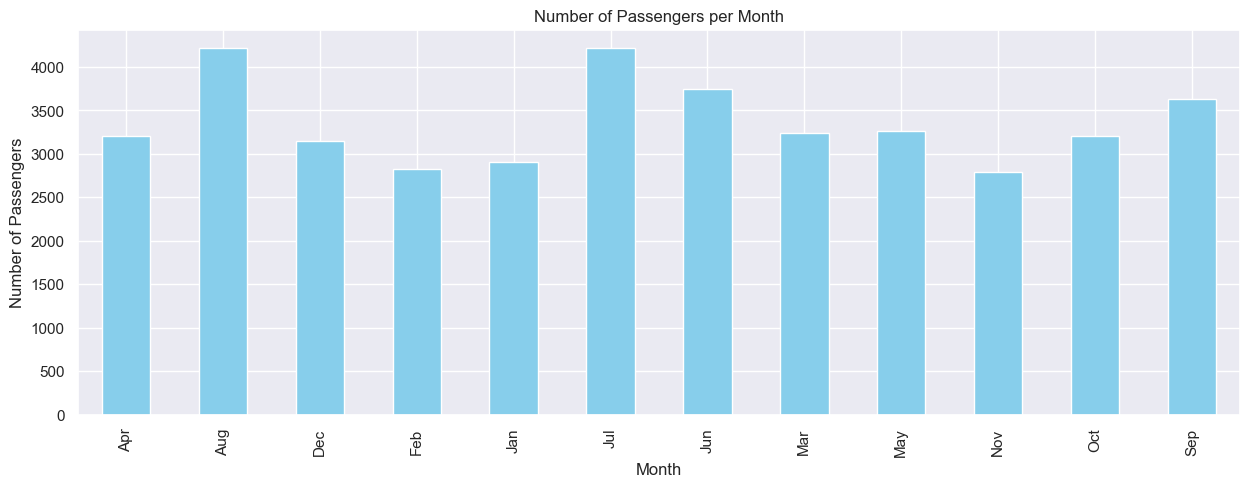